In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\patri\Downloads\CSVs\Core\teams.csv')
df = pd.DataFrame(data)

In [3]:
#NaNs are because these features did not exist during that time period
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [4]:
#Filtering for only teams that won the World series
df_ws = df[df['WSWin']=='Y']
df_ws.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
147,1884,NL,PRO,PRO,NaN,1,114,NaN,84,28,...,50,0.918,Providence Grays,Messer Street Grounds,NaN,99,96,PRO,PRO,PRO
186,1886,AA,SL4,STL,NaN,1,139,NaN,93,46,...,96,0.915,St. Louis Browns,Sportsman's Park I,NaN,105,100,STL,SL4,SL4
195,1887,NL,DTN,DTN,NaN,1,127,NaN,79,45,...,92,0.925,Detroit Wolverines,Recreation Park,NaN,104,100,DTN,DTN,DTN
215,1888,NL,NY1,SFG,NaN,1,137,NaN,84,47,...,76,0.924,New York Giants,Polo Grounds I,NaN,99,96,NYG,NY1,NY1
231,1889,NL,NY1,SFG,NaN,1,131,NaN,83,43,...,90,0.919,New York Giants,Polo Grounds II,NaN,104,101,NYG,NY1,NY1


In [5]:
#Checking for any duplicate years
df_ws.duplicated(subset = 'yearID').sum()

0

In [6]:
#Checking for missing 1885 entry
df_ws[df_ws['yearID']==1885]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro


In [7]:
#Checking for amount of years in df
len(df_ws)

121

In [8]:
#Manually checking length
1+2020-1884

137

In [9]:
#Creating list of years from 1884-2020
year_array = np.linspace(1884,2020,137).astype('int')
year_array[0:5]

array([1884, 1885, 1886, 1887, 1888])

In [10]:
#Checking to see what years are missing
for i in range(len(df_ws)):
    if year_array[i] not in df_ws['yearID'].tolist():
        print(year_array[i])

1885
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1904
1994


In [11]:
#Explanation of missing values after research
#First modern WS started 1903
#1994 and 1904 WS, or other championship series was not held
#1900 - Brooklyn Superbas - Chtronicle Telegraph Cup
#1897 - Balimore Orioles - Temple Cup (Only NL)
#1896 - Batimore Orioles - Temple Cup (Only NL)
#1895 - Cleveland Spiders - Temple Cup (Only Nl)
#1894 - New York Giants - Temple Cup (Only NL)
#1892 - Boston Beaneaters - WS
#1890 - Bonston Beaneaters - WS
#1885 - St. Louis Browns - WS

In [12]:
#For the purpose of this exploration, I will leave out these entries, and focus on the modern WS wins. 

In [13]:
#Filtering DF for yearID > 1902
ws_modern = df_ws[df_ws['yearID']>1902]
ws_modern.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
415,1903,AL,BOS,BOS,NaN,1,141,70.0,91,47,...,86,0.959,Boston Americans,Huntington Avenue Grounds,379338.0,105,102,BOS,BOS,BOS
455,1905,NL,NY1,SFG,NaN,1,155,76.0,105,48,...,93,0.960,New York Giants,Polo Grounds III,552700.0,102,98,NYG,NY1,NY1
466,1906,AL,CHA,CHW,NaN,1,154,79.0,93,58,...,80,0.963,Chicago White Sox,South Side Park II,585202.0,98,95,CHW,CHA,CHA
483,1907,NL,CHN,CHC,NaN,1,155,76.0,107,45,...,110,0.967,Chicago Cubs,West Side Park II,422550.0,106,101,CHC,CHN,CHN
499,1908,NL,CHN,CHC,NaN,1,158,78.0,99,55,...,76,0.969,Chicago Cubs,West Side Park II,665325.0,104,100,CHC,CHN,CHN


In [14]:
#Connecting to local MySQL Server
import mysql.connector

db = mysql.connector.connect(
	host='localhost',
	user='root',
	password='mmnq3iAb1#mysql'
)

In [15]:
#Printing databases in the server
cursor = db.cursor()
cursor.execute('show databases')
for x in cursor:
    print(x)

('information_schema',)
('lahmansbaseballdb',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [16]:
#Using baseball database
cursor.execute('use lahmansbaseballdb')

In [17]:
#Writing SQL Query - all of the teams who have made it to post season

sql_query = """SELECT 
b.playerID, b.yearID, t.franchID, 
b.G, b.AB, b.R, b.H, b.HR,
b.RBI, b.SO, bp.G as post_G, 
bp.AB as post_AB, 
bp.R as post_R, bp.H as post_H, 
bp.HR as post_HR, bp.RBI as post_RBI, 
bp.SO as post_SO, W, L, WSWin

FROM 
batting as b

INNER JOIN 
battingpost as bp on (bp.yearID = b.yearID and bp.playerID=b.playerID and bp.teamID = b.teamID)

INNER JOIN 
teams as t on (t.yearID = b.yearID and t.teamID = b.teamID)

WHERE 
b.yearID >= 1903

ORDER BY 
b.yearID, b.teamID"""

In [18]:
#Writing query to a DataFrame
cursor.execute(sql_query)
results = cursor.fetchall()
df = pd.DataFrame(results)

In [19]:
#Creating column labels
df.columns = cursor.column_names

In [20]:
#Print head of df
df.head()

,playerID,yearID,franchID,G,AB,R,H,HR,RBI,SO,post_G,post_AB,post_R,post_H,post_HR,post_RBI,post_SO,W,L,WSWin
0,doughpa01,1903,BOS,139,590,107,195,4,59,62.0,8,34,3,8,2,5,6,91,47,Y
1,stahlch01,1903,BOS,77,299,60,82,2,44,28.0,8,33,6,10,0,3,2,91,47,Y
2,youngcy01,1903,BOS,41,137,21,44,1,14,20.0,4,15,1,1,0,3,3,91,47,Y
3,colliji01,1903,BOS,130,540,88,160,5,72,28.0,8,36,5,9,0,1,1,91,47,Y
4,crigelo01,1903,BOS,96,317,41,61,3,31,31.0,8,26,1,6,0,4,3,91,47,Y


In [21]:
#Dropping columns and selecting only one entry for each team per year
win_per_df = df.drop_duplicates(subset = ['yearID', 'franchID'], keep = 'first').drop('playerID', axis=1)
win_per_df.head()

,yearID,franchID,G,AB,R,H,HR,RBI,SO,post_G,post_AB,post_R,post_H,post_HR,post_RBI,post_SO,W,L,WSWin
0,1903,BOS,139,590,107,195,4,59,62.0,8,34,3,8,2,5,6,91,47,Y
13,1903,PIT,127,505,69,134,2,57,42.0,8,29,3,6,0,1,6,91,49,N
27,1905,SFG,34,97,6,14,0,7,40.0,1,0,0,0,0,0,0,105,48,Y
39,1905,OAK,38,92,11,20,0,14,19.0,2,5,0,0,0,0,1,92,56,N
53,1906,CHW,38,100,4,16,0,3,15.0,2,4,0,1,0,0,1,93,58,Y


In [22]:
#Checking the teams for an example year - only post season teams confirmed
df[df['yearID'] == 2010]['franchID'].unique().tolist()

['ATL', 'CIN', 'MIN', 'NYY', 'PHI', 'SFG', 'TBD', 'TEX']

In [23]:
#Writing Query to include all teams, not just post season
sql_query = """SELECT 
b.playerID, b.yearID, t.franchID, 
b.G, b.AB, b.R, b.H, b.HR,
b.RBI, b.SO, bp.G as post_G, 
bp.AB as post_AB, 
bp.R as post_R, bp.H as post_H, 
bp.HR as post_HR, bp.RBI as post_RBI, 
bp.SO as post_SO, W, L, WSWin

FROM 
batting as b

LEFT JOIN 
battingpost as bp on (bp.yearID = b.yearID and bp.playerID=b.playerID and bp.teamID = b.teamID)

INNER JOIN 
teams as t on (t.yearID = b.yearID and t.teamID = b.teamID)

WHERE 
b.yearID >= 1903

ORDER BY 
b.yearID, b.teamID"""

In [24]:
#Writing query to a DataFrame
cursor.execute(sql_query)
results = cursor.fetchall()
df_all = pd.DataFrame(results)

In [25]:
#Creating column labels
df_all.columns = cursor.column_names

In [26]:
#Checking head of df - nulls are just because they were not in the post season
df_all.head()

,playerID,yearID,franchID,G,AB,R,H,HR,RBI,SO,post_G,post_AB,post_R,post_H,post_HR,post_RBI,post_SO,W,L,WSWin
0,ferriho01,1903,BOS,141,525,69,132,9,66,59.0,8.0,31.0,3.0,9.0,0.0,5.0,6.0,91,47,Y
1,freembu01,1903,BOS,141,567,74,163,13,104,73.0,8.0,32.0,6.0,9.0,0.0,4.0,2.0,91,47,Y
2,hugheto01,1903,BOS,33,93,14,26,1,13,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,91,47,Y
3,altroni01,1903,BOS,1,3,0,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,47,Y
4,stahlja01,1903,BOS,40,92,14,22,2,8,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,47,Y


In [27]:
#Dropping columns and selecting only one entry for each team per year
win_per_all_df = df_all.drop_duplicates(subset = ['yearID', 'franchID'], keep = 'first').drop('playerID', axis=1)
win_per_all_df.head()

,yearID,franchID,G,AB,R,H,HR,RBI,SO,post_G,post_AB,post_R,post_H,post_HR,post_RBI,post_SO,W,L,WSWin
0,1903,BOS,141,525,69,132,9,66,59.0,8.0,31.0,3.0,9.0,0.0,5.0,6.0,91,47,Y
20,1903,LAD,38,125,12,32,0,13,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,66,N
48,1903,ATL,48,173,11,38,1,10,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,80,N
65,1903,CHW,32,111,10,21,1,7,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,77,N
85,1903,CHC,2,2,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,56,N


In [28]:
#Checking the teams for an example year - all teams confirmed
len(df_all[df_all['yearID'] == 2010]['franchID'].unique().tolist())

30

In [29]:
#Going to come to this later, and focus soley on a log regression for highest win % and if/likelihood that they earned a World Series Win
#Writing Query to include all teams, not just post season
sql_query = """SELECT DISTINCT 
b.yearID, 
t.franchID, 
W, 
L, 
WSWin

FROM 
batting as b

INNER JOIN 
teams as t on (t.yearID = b.yearID and t.teamID = b.teamID)

WHERE 
b.yearID >= 1903

ORDER BY 
b.yearID, b.teamID"""


In [30]:
#Writing query to a DataFrame
cursor.execute(sql_query)
results = cursor.fetchall()
df_year_teams = pd.DataFrame(results)

In [31]:
#Creating column labels
df_year_teams.columns = cursor.column_names

In [32]:
df_year_teams.head()

,yearID,franchID,W,L,WSWin
0,1903,BOS,91,47,Y
1,1903,LAD,70,66,N
2,1903,ATL,58,80,N
3,1903,CHW,60,77,N
4,1903,CHC,82,56,N


In [33]:
#Finding win %
df_year_teams['Win Percent'] = df_year_teams.W/(df_year_teams.W+df_year_teams.L)
df_year_teams.head()

,yearID,franchID,W,L,WSWin,Win Percent
0,1903,BOS,91,47,Y,0.659420
1,1903,LAD,70,66,N,0.514706
2,1903,ATL,58,80,N,0.420290
3,1903,CHW,60,77,N,0.437956
4,1903,CHC,82,56,N,0.594203


In [34]:
#swapping column locations
df_year_teams = df_year_teams.iloc[:,[0,1,2,3,5,4]]
df_year_teams.head()

,yearID,franchID,W,L,Win Percent,WSWin
0,1903,BOS,91,47,0.659420,Y
1,1903,LAD,70,66,0.514706,N
2,1903,ATL,58,80,0.420290,N
3,1903,CHW,60,77,0.437956,N
4,1903,CHC,82,56,0.594203,N


In [35]:
#Replacing Y with 1 and N with 0
df_year_teams['WSWin'].replace({'Y':1, 'N':0}, inplace=True)
df_year_teams.head()

,yearID,franchID,W,L,Win Percent,WSWin
0,1903,BOS,91,47,0.659420,1.0
1,1903,LAD,70,66,0.514706,0.0
2,1903,ATL,58,80,0.420290,0.0
3,1903,CHW,60,77,0.437956,0.0
4,1903,CHC,82,56,0.594203,0.0


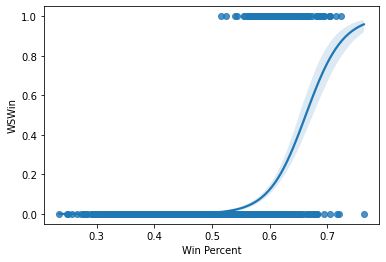

In [36]:
#Logarithmic Regression for all teams win %s - hard to see anything here, easy to tell low win % teams (<50%) are not winning the World Series
_=sns.regplot(x = 'Win Percent', y= 'WSWin', logistic=True, data = df_year_teams)
plt.show()

In [37]:
#Creating df for only the highest win % each year
df_highest_per = pd.DataFrame(columns = ['yearID', 'franchID', 'W', 'L', 'WSWin', 'Win Percent'])
for year in df_year_teams['yearID'].unique().tolist():
    filter1 = df_year_teams['Win Percent'] == df_year_teams[df_year_teams['yearID'] == year]['Win Percent'].max()
    filter2 = df_year_teams['yearID']==year
    highest_percent = df_year_teams.loc[filter1 & filter2]
    df_highest_per = pd.concat([df_highest_per, highest_percent])

In [38]:
df_highest_per.head()

,yearID,franchID,W,L,WSWin,Win Percent
0,1903,BOS,91,47,1.0,0.65942
24,1904,SFG,106,47,NaN,0.69281
40,1905,SFG,105,48,1.0,0.686275
52,1906,CHC,116,36,0.0,0.763158
68,1907,CHC,107,45,1.0,0.703947


In [39]:
#Checking 1904 and 1994, going to drop as there were no WS
f1 = df_highest_per['yearID']==1994 
f2 = df_highest_per['yearID']==1904
df_highest_per.loc[f1 | f2]

,yearID,franchID,W,L,WSWin,Win Percent
24,1904,SFG,106,47,NaN,0.69281
1754,1994,WSN,74,40,NaN,0.649123


In [40]:
#Checking NaNs
df_highest_per.isna().sum()

yearID         0
franchID       0
W              0
L              0
WSWin          2
Win Percent    0
dtype: int64

In [41]:
#Using dropna here, as i want to drop the two rows with the only NaNs - resetting index, and dropping the old indices
df_highest_per = df_highest_per.dropna(axis=0).reset_index().drop('index', axis=1)
#Could also use:
#df_highest_per.drop(df_highest_per.loc[df_highest_per['yearID']==1994].index)

In [42]:
#Checking length
len(df_highest_per)

121

In [43]:
#Checking for duplicate year entries
df_highest_per[df_highest_per.duplicated(subset='yearID')]

,yearID,franchID,W,L,WSWin,Win Percent
46,1949,NYY,97,57,1.0,0.62987
56,1958,NYY,92,62,1.0,0.597403
101,2003,NYY,101,61,0.0,0.623457
105,2006,NYM,97,65,0.0,0.598765
107,2007,CLE,96,66,0.0,0.592593
114,2013,STL,97,65,0.0,0.598765


In [44]:
#Duplicate years are due to ties - Will leave these in the dataset
df_highest_per[df_highest_per['yearID']==1949]

,yearID,franchID,W,L,WSWin,Win Percent
45,1949,LAD,97,57,0.0,0.62987
46,1949,NYY,97,57,1.0,0.62987


In [45]:
#Checking data 
df_highest_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   yearID       121 non-null    object
 1   franchID     121 non-null    object
 2   W            121 non-null    object
 3   L            121 non-null    object
 4   WSWin        121 non-null    object
 5   Win Percent  121 non-null    object
dtypes: object(6)
memory usage: 5.8+ KB


In [46]:
#converting objects to floats or ints
df_highest_per['Win Percent'] = df_highest_per['Win Percent'].astype('float')
df_highest_per['WSWin'] = df_highest_per['WSWin'].astype('int')
df_highest_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearID       121 non-null    object 
 1   franchID     121 non-null    object 
 2   W            121 non-null    object 
 3   L            121 non-null    object 
 4   WSWin        121 non-null    int32  
 5   Win Percent  121 non-null    float64
dtypes: float64(1), int32(1), object(4)
memory usage: 5.3+ KB


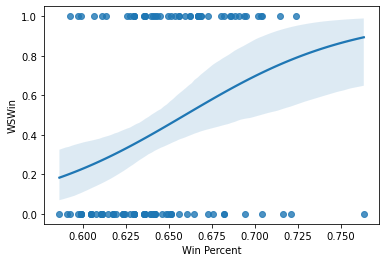

In [47]:
#Logarithmic Regression for all teams win %s - hard to see anything here, easy to tell low win % teams (<50%) are not winning the World Series
_=sns.regplot(x = 'Win Percent', y = 'WSWin', logistic=True, data = df_highest_per)
plt.show()
#We can see win teams a pretty big spread.  We will have to run a significance test on this to have a better idea if highest win % has a higher likelihood of winning the WS
#The win %s of WS Winners seem to me a little higher on average than that of the non-winners.

In [48]:
#Count of teams who won with the highest overall win %
sum(df_highest_per['WSWin'])

51

### Using SciKit to see if Win% is a good predictor of winning the WS

In [49]:
#Define x and y variables
x = df_highest_per['Win Percent'].to_numpy()
y = df_highest_per['WSWin'].to_numpy()

#Create Train and Test Datasets
#Used stratified sampling (putting them in groups before sampling, then sampling from each group proportional to their size)
#Outcome is binomial dist, 1s and 0s (2s and 4s here)
#Needs to be stratified (could be systematic) for logistic models/all classification algorithms.

#Reshaping, as I am only using one feature here, Win Percent
x = x.reshape(-1, 1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=100)


#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#This is using Z-Score as a scaler
#fit() calculates the parameters μ and σ and saves them as internal objects.
#We use this on the training data
#transform(): Using these calculated parameters apply the transformation to a particular dataset.
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [50]:
#Script for Logistical Regression
#Using lbfgs for smaller dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('Logistic Regression', LogisticRegression(solver='lbfgs',random_state=100))]: 
    method.fit(x_train2,y_train)
    #returns the predicted y-values based on the x_test2 values
    predict = method.predict(x_test2)
    target_names=['WS Loss','WS Win']
    #Compares the y_test values to the predict values, to see which match, and constructs confusion matrix
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))

[[11  3]
 [ 7  4]]
              precision    recall  f1-score   support

     WS Loss       0.61      0.79      0.69        14
      WS Win       0.57      0.36      0.44        11

    accuracy                           0.60        25
   macro avg       0.59      0.57      0.57        25
weighted avg       0.59      0.60      0.58        25



##### Looks like win % alone is not a great predictor for the teams with the highest win %

## Let's test this for the entire set of data - every team, each year.


In [51]:
df_year_teams.head()

,yearID,franchID,W,L,Win Percent,WSWin
0,1903,BOS,91,47,0.659420,1.0
1,1903,LAD,70,66,0.514706,0.0
2,1903,ATL,58,80,0.420290,0.0
3,1903,CHW,60,77,0.437956,0.0
4,1903,CHC,82,56,0.594203,0.0


In [52]:
#Checking for nulls
df_year_teams.isna().sum()

yearID          0
franchID        0
W               0
L               0
Win Percent     0
WSWin          60
dtype: int64

In [53]:
#Filtering out the nulls
df_year_teams_test = df_year_teams[~df_year_teams['WSWin'].isna()]
print(df_year_teams_test['WSWin'].isna().sum())
df_year_teams_test.head()

0


,yearID,franchID,W,L,Win Percent,WSWin
0,1903,BOS,91,47,0.659420,1.0
1,1903,LAD,70,66,0.514706,0.0
2,1903,ATL,58,80,0.420290,0.0
3,1903,CHW,60,77,0.437956,0.0
4,1903,CHC,82,56,0.594203,0.0


In [54]:
#Define x and y variables
x = df_year_teams_test['Win Percent'].to_numpy()
y = df_year_teams_test['WSWin'].to_numpy()

#Create Train and Test Datasets
#Used stratified sampling (putting them in groups before sampling, then sampling from each group proportional to their size)
#Outcome is binomial dist, 1s and 0s (2s and 4s here)
#Needs to be stratified (could be systematic) for logistic models/all classification algorithms.

#Reshaping, as I am only using one feature here, Win Percent
x = x.reshape(-1, 1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=100)


#Scale the Data

sc = StandardScaler()
#This is using Z-Score as a scaler
#fit() calculates the parameters μ and σ and saves them as internal objects.
#We use this on the training data
#transform(): Using these calculated parameters apply the transformation to a particular dataset.
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [55]:
#Using lbfgs for smaller dataset
for name,method in [('Logistic Regression', LogisticRegression(solver='lbfgs',random_state=100))]: 
    method.fit(x_train2,y_train)
    #returns the predicted y-values based on the x_test2 values
    predict = method.predict(x_test2)
    target_names=['WS Loss','WS Win']
    #Compares the y_test values to the predict values, to see which match, and constructs confusion matrix
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))

[[465   2]
 [ 18   5]]
              precision    recall  f1-score   support

     WS Loss       0.96      1.00      0.98       467
      WS Win       0.71      0.22      0.33        23

    accuracy                           0.96       490
   macro avg       0.84      0.61      0.66       490
weighted avg       0.95      0.96      0.95       490



### Win % Seems to be a better predictor for the entirety of the MLB Modern World Series Era, but this model struggles at predicting the winners. - Need to consider more data than just win %

In [ ]:
#Have a new file where I am working with many more features and exploring other models